(9154, 4)
    time  fullness   roc      class
0    267     36.07  0.00  dustbin 1
1    268     36.00 -0.07  dustbin 1
2    269     37.52  1.52  dustbin 1
3    270     36.04 -1.48  dustbin 1
4    271     34.26 -1.78  dustbin 1
5    272     34.26  0.00  dustbin 1
6    273     34.30  0.04  dustbin 1
7    274     35.59  1.29  dustbin 1
8    275     34.19 -1.40  dustbin 1
9    276     34.15 -0.04  dustbin 1
10   277     35.41  1.26  dustbin 1
11   278     35.74  0.33  dustbin 1
12   279     35.52 -0.22  dustbin 1
13   280     35.70  0.18  dustbin 1
14   281     34.26 -1.44  dustbin 1
15   282     34.93  0.67  dustbin 1
16   283     35.07  0.14  dustbin 1
17   284     34.30 -0.77  dustbin 1
18   285     35.67  1.37  dustbin 1
19   286     35.74  0.07  dustbin 1
time          int64
fullness    float64
roc         float64
class        object
dtype: object
              time     fullness          roc
count  9154.000000  9154.000000  9154.000000
mean    789.480992    43.717466     0.011781
std  

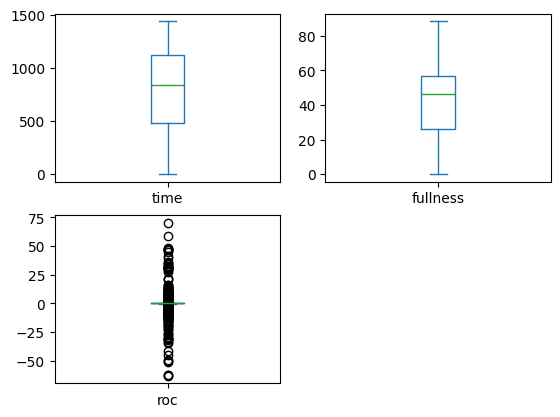

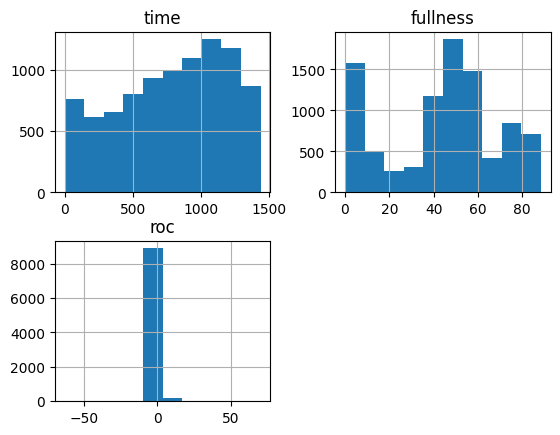

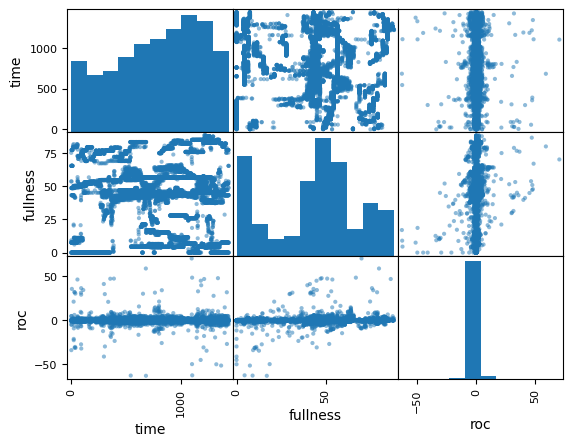

KNN: 0.862214 (0.011044)
CART: 0.965589 (0.005133)
SVM: 0.833266 (0.014380)
0.8481703986892408
[[541  13  17   7]
 [ 99 323   0   8]
 [ 55   0 290   1]
 [ 76   1   1 399]]
              precision    recall  f1-score   support

   dustbin 1       0.70      0.94      0.80       578
   dustbin 2       0.96      0.75      0.84       430
   dustbin 3       0.94      0.84      0.89       346
   dustbin 4       0.96      0.84      0.89       477

    accuracy                           0.85      1831
   macro avg       0.89      0.84      0.86      1831
weighted avg       0.87      0.85      0.85      1831



In [3]:
# compare algorithms
# Everything should load without error. If you have an error, stop. You need a working SciPy
# environment before continuing.
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Load dataset
#If you do have network problems, you can download the iris.csv file into your working directory
#and load it using the same method, changing URL to the local file name.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
file_path = 'final_data.csv'
names = ['time', 'fullness', 'roc', 'class']
dataset = read_csv(file_path, names=names)
# dataset = read_csv(url, names=names)
#We can get a quick idea of how many instances (rows) and how many attributes (columns) the data
#contains with the shape property. You should see 150 instances and 5 attributes
#shape
print(dataset.shape)
#You should see the first 20 rows of the data:
# head
print(dataset.head(20))
#Now we can take a look at a summary of each attribute.
#This includes the count, mean, the min and max values as well as some percentiles.
#descriptions
#We can see that all of the numerical values have the same scale (centimeters)
#and similar ranges between 0 and 8 centimeters.
print(dataset.dtypes)
print(dataset.describe())
#Let’s now take a look at the number of instances (rows) that belong to each class.
#We can view this as an absolute count.
#We can see that each class has the same number of instances (50 or 33% of the dataset).
#class distribution
print(dataset.groupby('class').size())
#Given that the input variables are numeric, we can create box and whisker plots of each.
#This gives us a much clearer idea of the distribution of the input attributes
#box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False) # Changed layout to (2,3)

pyplot.show()
#We can also create a histogram of each input variable to get an idea of the distribution.
#It looks like perhaps two of the input variables have a Gaussian distribution.
#This is useful to note as we can use algorithms that can exploit this assumption.
#histograms
dataset.hist()
pyplot.show()
#First, let’s look at scatterplots of all pairs of attributes.
#This can be helpful to spot structured relationships between input variables.
#Note the diagonal grouping of some pairs of attributes.
#This suggests a high correlation and a predictable relationship.
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
#We will split the loaded dataset into two, 80% of which we will use to train,
#evaluate and select among our models,
#and 20% that we will hold back as a validation dataset.
#You now have training data in the X_train and Y_train for preparing models and
#a X_validation and Y_validation sets that we can use later.
#Notice that we used a python slice to select the columns in the NumPy array.
#Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

#Let’s test 3 different algorithms:
#K-Nearest Neighbors (KNN).
#Classification and Regression Trees (CART).
#Support Vector Machines (SVM).
#This is a good mixture of nonlinear (KNN, CART and SVM) algorithms.
# Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#We now have 3 models and accuracy estimations for each.
#We need to compare the models to each other and select the most accurate.
#Evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
#We can evaluate the predictions by comparing them to the expected results
#in the validation set, then calculate classification accuracy,
#as well as a confusion matrix and a classification report.
#Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
#We can see that the accuracy is 0.966 or about 96% on the hold out dataset.
#The confusion matrix provides an indication of the three errors made.
#Finally, the classification report provides a breakdown of each class by precision,
#recall, f1-score and support showing excellent results
#(granted the validation dataset was small).

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import os
import matplotlib.pyplot as plt

# Define the path to the CSV file
csv_path = "silo1.csv"

# Check if the file exists
if os.path.exists(csv_path):
    # Load the CSV file
    data = pd.read_csv(csv_path)
    
    # Calculate the rate of change in inventory level (units per minute)
    data['rate_of_change'] = data['Inventory Level'].diff() / data['Minute'].diff()
    
    # Set any positive rate of change to zero (only capturing depletion)
    data['rate_of_change'] = data['rate_of_change'].apply(lambda x: x if x < 0 else 0)

    # Drop rows with NaN values resulting from the diff() function
    data.dropna(inplace=True)

    # Convert 'Minute' to 'Hour of Day' (0-23) and 'Weekday' as features
    data['minute_of_day'] = data['Minute'] % 1440
    data['hour_of_day'] = data['minute_of_day'] // 60

    # Display the data for verification
    print("Sample of the Data with Adjusted Rate of Change, Time, and Weekday:")
    print(data.head())

    # Prepare features: Minute of Day and Weekday
    X = data[['minute_of_day', 'Weekday']]
    y = data['rate_of_change']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error of Rate of Change Prediction: {mae:.4f} units/minute")

    # Example inputs: Inventory level, Minute of day, Weekday
    current_inventory_level = 100  # Example current inventory level
    minute_of_day = 12 * 60  # 12 PM in minutes from start of day
    weekday = 3  # Thursday
    time_elapsed = 0  # Track total time until depletion

    # Run a while loop until the inventory is depleted
    while current_inventory_level > 0:
        # Predict the rate of change for the current time and weekday
        new_input = np.array([[minute_of_day, weekday]])
        predicted_rate_of_change = model.predict(new_input)[0]
        

        # If the rate of change is negative, decrease the inventory
        if predicted_rate_of_change < 0:
            current_inventory_level += predicted_rate_of_change
            time_elapsed += 1  # Increment time by one minute
            minute_of_day = (minute_of_day + 1) % 1440  # Update time within the day

            # Update weekday if it is the start of a new day
            if minute_of_day == 0:
                weekday = (weekday + 1) % 7
        else:
            time_elapsed += 1  # Increment time by one minute
            minute_of_day = (minute_of_day + 1) % 1440  # Update time within the day

            # Update weekday if it is the start of a new day
            if minute_of_day == 0:
                weekday = (weekday + 1) % 7

        # Check if inventory has reached zero or below
        if current_inventory_level <= 0:
            print(f"Inventory depleted after {time_elapsed} minutes.")
            break

    if current_inventory_level > 0:
        print("Inventory is not depleting based on the current predictions.")

else:
    print(f"File '{csv_path}' not found. Ensure the file exists and try again.")

Sample of the Data with Adjusted Rate of Change, Time, and Weekday:
   Minute  Inventory Level  Weekday  rate_of_change  minute_of_day  \
0       0        99.657394        0        0.000000              0   
1       1        99.355834        0       -0.301560              1   
2       2        99.120654        0       -0.235180              2   
3       3        98.861833        0       -0.258821              3   
4       4        98.549337        0       -0.312496              4   

   hour_of_day  
0            0  
1            0  
2            0  
3            0  
4            0  
Mean Absolute Error of Rate of Change Prediction: 0.0515 units/minute
Inventory depleted after 3815 minutes.


c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages

In [11]:
import joblib
model_filename = "model4.pkl"
# Load the model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

# Use the loaded model to make predictions
new_input = np.array([[12 * 60, 3]])  # Example input for 12 PM on Thursday
predicted_rate_of_change = loaded_model.predict(new_input)
print(f"Predicted rate of change: {predicted_rate_of_change[0]:.4f} units/minute")

current_inventory_level = 100  # Example current inventory level
minute_of_day = 12 * 60  # 12 PM in minutes from start of day
weekday = 3  # Thursday
time_elapsed = 0  # Track total time until depletion

# Run a while loop until the inventory is depleted
while current_inventory_level > 0:
    # Predict the rate of change for the current time and weekday
    new_input = np.array([[minute_of_day, weekday]])
    predicted_rate_of_change = loaded_model.predict(new_input)[0]
    
    # If the rate of change is negative, decrease the inventory
    if predicted_rate_of_change < 0:
        current_inventory_level += predicted_rate_of_change

    time_elapsed += 1  # Increment time by one minute
    minute_of_day = (minute_of_day + 1) % 1440  # Update time within the day

    # Update weekday if it is the start of a new day
    if minute_of_day == 0:
        weekday = (weekday + 1) % 7

    # Check if inventory has reached zero or below
    if current_inventory_level <= 0:
        print(f"Inventory depleted after {time_elapsed} minutes.")
        break


Model loaded successfully.
Predicted rate of change: -0.1107 units/minute
Inventory depleted after 1051 minutes.


c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Public\ECE4810\AI\.venv\lib\site-packages

   Minute  Inventory Level  Weekday
0       0        99.998387        0
1       1        99.997688        0
2       2        99.996855        0
3       3        99.995617        0
4       4        99.994221        0


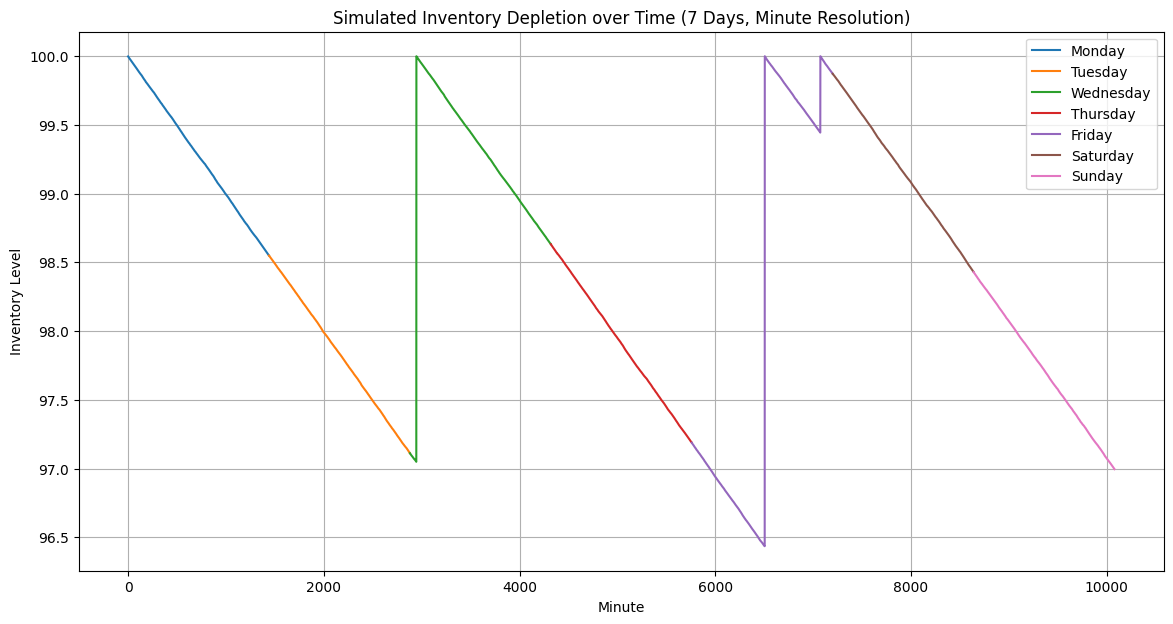

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
minutes_per_day = 1440  # Number of minutes in a day
days = 7  # Number of days to simulate
total_minutes = minutes_per_day * days  # Total minutes over the week
initial_inventory = 100  # Starting inventory level
depletion_rate_per_min_mean = 0.001  # Average depletion per minute
depletion_rate_per_min_std = 0.0003  # Standard deviation of the depletion rate per minute
restock_amount_mean = 30  # Average restock amount
restock_amount_std = 5  # Standard deviation of the restock amount

# Function to determine restock probability based on inventory level
def calculate_restock_probability(inventory_level, max_inventory):
    base_probability = 0.0002  # Minimum probability
    max_probability = 0.002  # Maximum probability
    probability = base_probability + (max_probability - base_probability) * (1 - (inventory_level / max_inventory))
    return probability

# Initialize lists to hold data
minute_list = []
inventory_list = []
weekday_list = []
current_inventory = initial_inventory
max_inventory = initial_inventory  # Assuming starting inventory as the maximum

# Generate fake data for 7 days
for minute in range(total_minutes):
    # Determine the current weekday (0 = Monday, 6 = Sunday)
    current_weekday = (minute // minutes_per_day) % 7
    
    # Simulate depletion
    depletion = np.random.normal(depletion_rate_per_min_mean, depletion_rate_per_min_std)
    current_inventory -= depletion

    # Calculate restock probability based on current inventory level
    restock_probability_per_min = calculate_restock_probability(current_inventory, max_inventory)

    # Simulate restock based on calculated probability
    if np.random.rand() < restock_probability_per_min:
        restock_amount = np.random.normal(restock_amount_mean, restock_amount_std)
        current_inventory += restock_amount

    # Ensure inventory level does not exceed the maximum
    current_inventory = min(current_inventory, max_inventory)
    # Ensure inventory level does not go negative
    current_inventory = max(current_inventory, 0)

    # Append data for this minute
    minute_list.append(minute)
    inventory_list.append(current_inventory)
    weekday_list.append(current_weekday)

# Create a DataFrame
data = pd.DataFrame({
    'Minute': minute_list,
    'Inventory Level': inventory_list,
    'Weekday': weekday_list
})

# Display the first few rows of the generated data
print(data.head())

# Map weekday numbers to names for better plot readability
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['Weekday Name'] = data['Weekday'].map(weekday_map)

# Plot the simulated data with color differentiation by weekday
plt.figure(figsize=(14, 7))
for weekday in range(7):
    day_data = data[data['Weekday'] == weekday]
    plt.plot(day_data['Minute'], day_data['Inventory Level'], label=weekday_map[weekday])

plt.xlabel('Minute')
plt.ylabel('Inventory Level')
plt.title('Simulated Inventory Depletion over Time (7 Days, Minute Resolution)')
plt.legend()
plt.grid(True)
plt.show()
